<a href="https://colab.research.google.com/github/ITA-LOW/MTM3587-08222-2021-2-Aprendizado-de-Maquina/blob/main/PCA_x_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exemplo de como o PCA e o t-SNE atuam para redução de dimensionalidade considerando decomposição em componentes

In [3]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [26]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

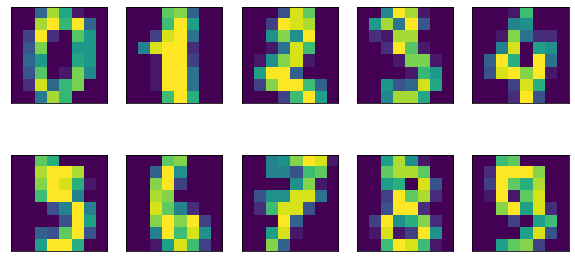

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
 subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
 ax.imshow(img)


In [11]:
pca = PCA(n_components=2)
pca.fit(digits.data)

PCA(n_components=2)

In [14]:
digits_pca = pca.transform(digits.data)

In [16]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
 "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

Text(0, 0.5, 'Second principal component')

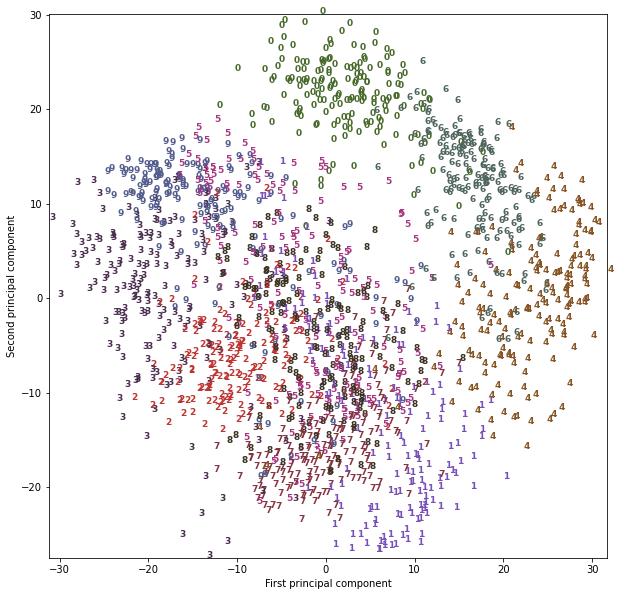

In [17]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
 # actually plot the digits as text instead of using scatter
 plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
 color = colors[digits.target[i]],
 fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

In [19]:
digits_tsne = tsne.fit_transform(digits.data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(0.5, 0, 't-SNE feature 1')

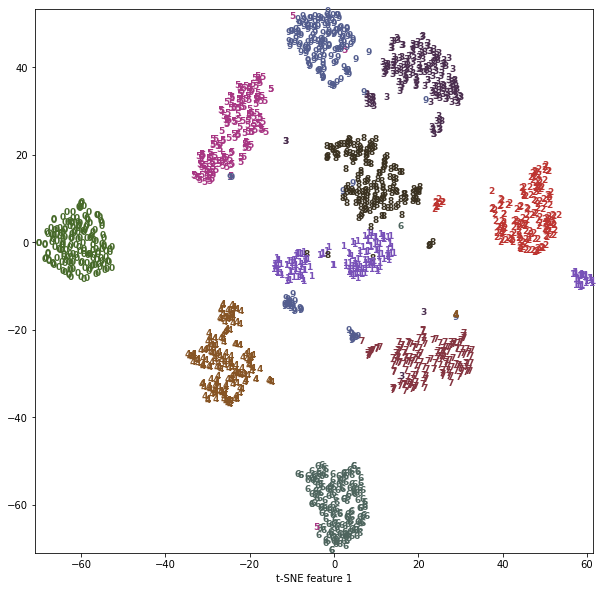

In [20]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
 # actually plot the digits as text instead of using scatter
 plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
 color = colors[digits.target[i]],
 fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")


usando 2 componentes com t-SNE as classes se agruparam de maneira mais clara